<a href="https://colab.research.google.com/github/sharksurfauto-byte/GGC-Machine-Learning-Workshop-25/blob/main/KMeans_Clustering_%26_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.datasets import make_blobs #Used to generate random clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# KMeans Clustering

## Making Random Clusters using **make_blob**

In [ ]:
X, y_true = make_blobs(n_samples=500, centers = 3, cluster_std=0.60, random_state = 42)

In [ ]:
df = pd.DataFrame(X, columns = ['Feature_1', 'Feature_2'])

In [ ]:
df.head()

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324


In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

## Implementing Elbow Method to determine the best value of K

In [ ]:
inertia = [] # WCSS (winthin Cluster squared summ distance) is also known as inertia
K_range = range(1,11) # THe range of K value we wanna test

In [ ]:
for K in K_range:
  kmeans = KMeans(n_clusters=K, random_state = 42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [ ]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

## Plotting the inertia points to figure out the best value of K

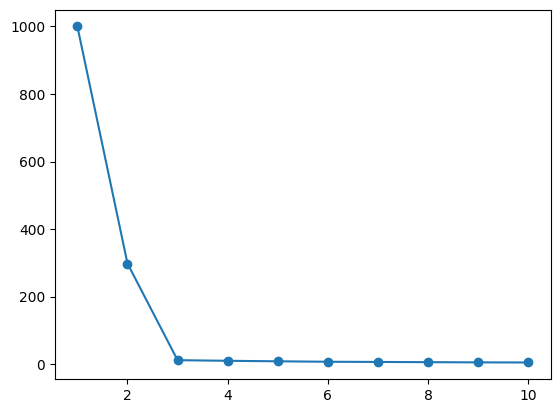

In [ ]:
plt.plot(K_range, inertia, marker = 'o')

From the graph we know that the best value of K is 3

In [ ]:
kmeans_final = KMeans(n_clusters = 3, random_state = 42)

cluster_labels = kmeans_final.fit_predict(X_scaled)  # Used to provide labels to the cluster groups

In [ ]:
df['cluster_labels'] = cluster_labels

In [ ]:
df.head()

,Feature_1,Feature_2,cluster_labels
0,-6.190063,-7.302015,1
1,3.021747,1.940593,0
2,5.953761,1.488191,0
3,-2.744463,8.136177,2
4,5.360607,1.728324,0


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

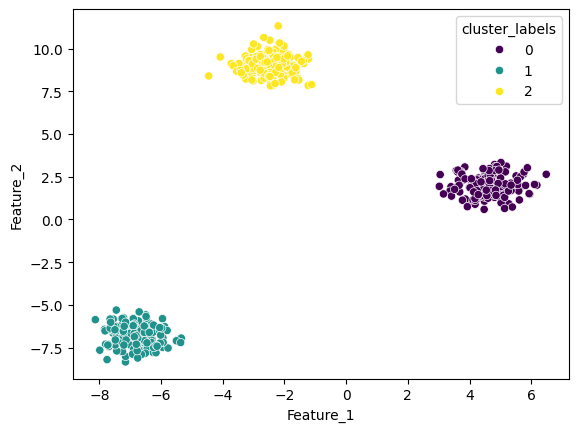

In [ ]:
sns.scatterplot(
    x = df['Feature_1'],             # X axis
    y = df['Feature_2'],             # Y axis
    hue = df['cluster_labels'],      # colour of the points
    palette = 'viridis'              # color palette
    )

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
from sklearn.datasets import make_moons # Appropriate for DBSCAN

In [ ]:
X, y_true = make_moons(n_samples = 500, noise = 0.05, random_state = 42 )

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
df = pd.DataFrame(X, columns = ['Feature_1', 'Feature_2'])

In [ ]:
df.head()

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185


In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
df['kmeans_clusters'] = kmeans_labels

In [ ]:
df.head()

,Feature_1,Feature_2,kmeans_clusters
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

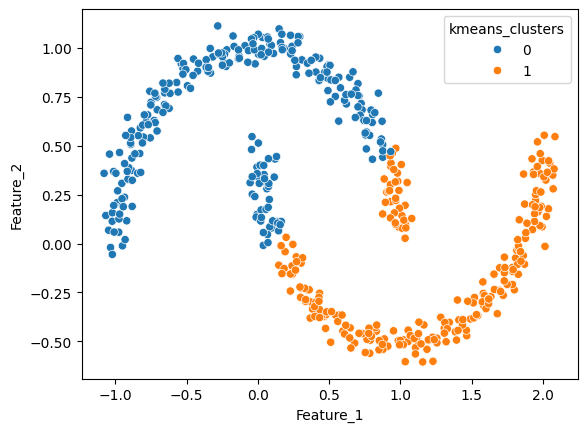

In [ ]:
sns.scatterplot(
    x = df['Feature_1'],
    y = df['Feature_2'],
    hue = df['kmeans_clusters'],
    palette = 'tab10'
)

## Now implementing DBSCAN and comparing both

In [ ]:
dbscan = DBSCAN(eps = 0.3, min_samples = 5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
df['dbscan_labels'] = dbscan_labels

In [ ]:
df.head()

,Feature_1,Feature_2,kmeans_clusters,dbscan_labels
0,0.830586,-0.447733,1,0
1,0.701678,0.816918,0,1
2,1.022080,-0.492571,1,0
3,-0.316765,0.953438,0,1
4,0.293226,1.057185,0,1


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

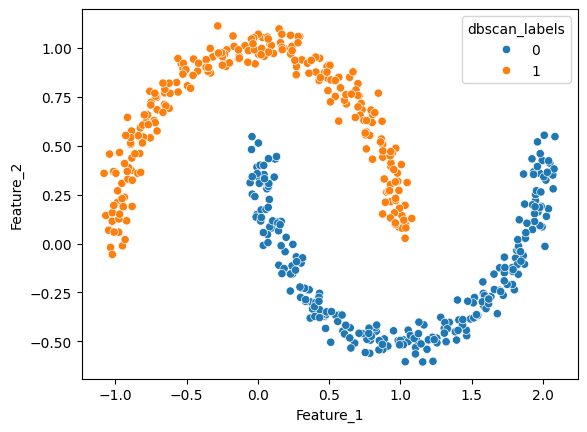

In [ ]:
sns.scatterplot(
    x = df['Feature_1'],
    y = df['Feature_2'],
    hue = df['dbscan_labels'],
    palette = 'tab10'
)